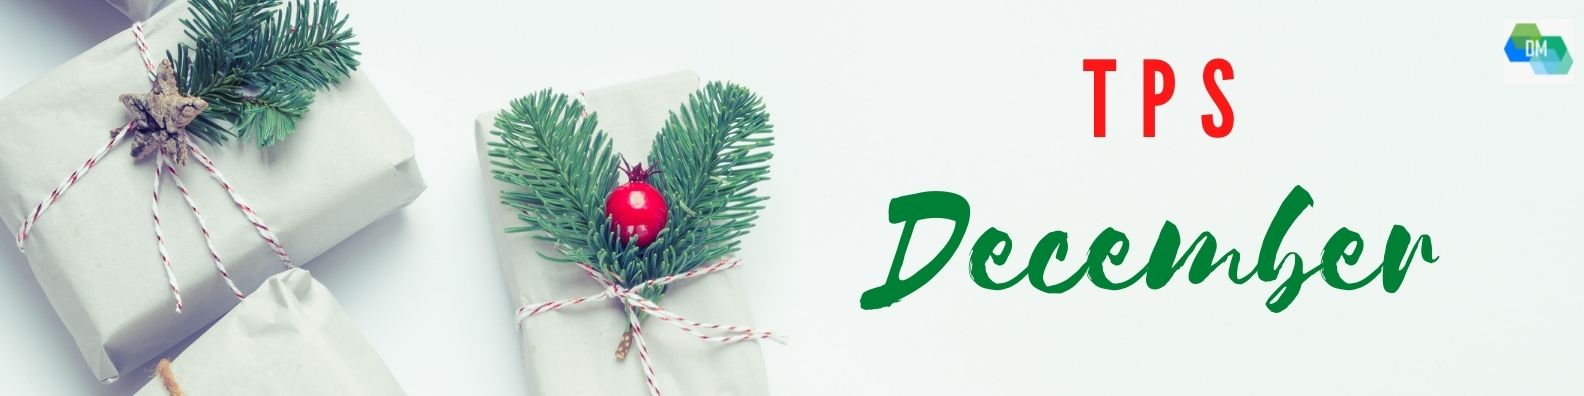

**Observations on this TPS dataset:**
- `Cover_Type` column is the target variable
- `Train` dataset has `40,00,000` rows and `56` columns which contains`54` features, `1` target variable `target` and `1` column of `id`
- `10` features are numerical and rest`44` features are categorical
- `Test` dataset has `10,00,000` rows and `55` columns which contains`54` features with`1` column of `id`
- No missing values in train and test dataset


<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    pass
        else:
            df[col] = df[col].astype('category')
    return df

In [ ]:
df_train = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
reduce_memory_usage(df_train)
df_test = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')
reduce_memory_usage(df_test)
df_subm = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#70D6FF","#FF70A6","#FF9770","#FFD670","#E9FF70"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [ ]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 18px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">There are no missing values.</p>

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
df_train.drop(columns = 'Id', inplace = True)
df_test.drop(columns = 'Id', inplace = True)

In [ ]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths =.6)
plt.title('Correlation')
plt.show()

In [ ]:
df_train.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)
df_test.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)

In [ ]:
df_train.Cover_Type.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
bar_ch = ax.bar(df_train['Cover_Type'].value_counts().sort_index().index, df_train['Cover_Type'].value_counts().sort_index().values, color=['#70D6FF',"#FF70A6","#FF9770",'#70D6FF',"#FF70A6","#FFD670","#E9FF70"])
plt.text(3.9,2650000, 'How cover type is distributed?',{'font': 'Times New Roman','fontsize': 'xx-large','style':'normal'})
ax.tick_params(axis="x", pad=20)
ax.bar_label(bar_ch, [f"{x*100:2.1f}%" for x in df_train['Cover_Type'].value_counts().sort_index().values/len(df_train)])
ax.set_xticklabels(('0','1', '2', '3','4','5','6','7'))
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 14px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">Target distribution is imbalanced. Covertype 2 is the most dominated. There is no existence of Covertype 4 and 5.</p>

In [ ]:
# define dataset
X = df_train.drop('Cover_Type', axis=1)
y = df_train['Cover_Type']

In [ ]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>XGBOOST </centre></strong></h3>

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
model1 = XGBClassifier(random_state=42,n_estimators= 500,learning_rate=0.05,eval_metric="auc",
                      max_depth=8,booster='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type="GPU")
model1.fit(X,y)

In [ ]:
predicted1 = model1.predict(X)

In [ ]:
m1_cm = confusion_matrix(y, predicted1)
m1_acc_score = accuracy_score(y, predicted1)
print("Confusion Matrix")
print(m1_cm)
sns.heatmap(m1_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of XGBoost:",round(m1_acc_score*100,2),'\n')
print(classification_report(y,predicted1))

In [ ]:
y_pred1 = model1.predict(df_test)

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(12,12))
plot_importance(model1, ax=ax, xlabel=None)
plt.show()

In [ ]:
df_subm['Cover_Type'] = y_pred1
df_subm

In [ ]:
df_subm.to_csv('submission_xgb.csv', index=False)

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>CATBOOST </centre></strong></h3>

In [ ]:
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(random_state=42,max_depth = 3, iterations = 5000,learning_rate=0.005,
                           early_stopping_rounds=50,task_type="GPU")
model2.fit(X,y, verbose=0)

In [ ]:
predicted2 = model2.predict(X)

In [ ]:
m2_cm = confusion_matrix(y, predicted2)
m2_acc_score = accuracy_score(y, predicted2)
print("Confusion Matrix")
print(m2_cm)
sns.heatmap(m2_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of CatBoost:",round(m2_acc_score*100,2),'\n')
print(classification_report(y,predicted2))

In [ ]:
y_pred2 = model2.predict(df_test)

In [ ]:
df_subm['Cover_Type'] = y_pred2
df_subm

In [ ]:
df_subm.to_csv('submission_catb.csv', index=False)

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>